# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи - предлагает клиентам  два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  

Задача: произвести предварительный анализ тарифов на небольшой выборке клиентов, проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

Входные данные: данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

<h2 id="tocheading">Содержание исследования</h2>


1. [Изучение общей информации о датасетах, выявление некорректных данных.](#point1)
  * [Вывод](#conclusion1)
2. [Предобработка данных:](#point2)
  * [Замена типа данных](#subpoint2_1)
  * [Исправление ошибок в данных](#subpoint2_2)
  * [Расчет новых показателей для анализа](#subpoint2_3)
  * [Вывод](#conclusion2)
3. [Анализ данных](#point3)
  * [Вывод](#conclusion3)
4. [Проверка гипотез](#point4)
  * [Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#subpoint4_1)
  * [Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#subpoint4_2)
  * [Вывод](#conclusion4)
5. [Общий вывод](#point5)


### 1. Изучение общей информации о датасетах, выявление некорректных данных. <a class="anchor" id="point1"></a>

#### Описание тарифов  

**Тариф «Смарт»**  
* Ежемесячная плата: 550 рублей  
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
* Стоимость услуг сверх тарифного пакета:  
   - минута разговора: 3 рубля  
   - сообщение: 3 рубля  
   - 1 Гб интернет-трафика: 200 рублей  
   
   
**Тариф «Ультра»**  
* Ежемесячная плата: 1950 рублей  
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
* Стоимость услуг сверх тарифного пакета:  
   - минута разговора: 1 рубль  
   - сообщение: 1 рубль  
   - 1 Гб интернет-трафика: 150 рублей  
   
***Внимание***: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

Уберем прокрутку вывода результатов ячейки

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Изучим общую информацию о предоставленнных датасетах

In [4]:
dfs = {'calls': calls,
       'internet': internet,
       'messages': messages,
       'tariffs': tariffs,
       'users': users}

In [80]:
for key in dfs:
    print(key)
    print('====================')
    display(dfs[key].info())
    print()
    display(dfs[key].sample(2))
    print()
    display(dfs[key].describe())
    print()
    print('Кол-во дубликатов: ', dfs[key].duplicated().sum())
    print()
    print('====================')

calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


None

,id,call_date,duration,user_id,month
127578,1327_153,2018-07-14,1.0,1327,7
28298,1070_173,2018-10-23,8.0,1070,10


,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,7.158198,1253.940619,8.574067
std,5.959173,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,2.000000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,11.000000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000



Кол-во дубликатов:  0

internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


None

,id,mb_used,session_date,user_id,month
120425,1405_101,1013.0,2018-12-03,1405,12
74837,1251_399,276.0,2018-09-08,1251,9


,mb_used,user_id,month
count,149396.000000,149396.000000,149396.000000
mean,370.622098,1252.099842,8.563315
std,278.387019,144.050823,2.788717
min,0.000000,1000.000000,1.000000
25%,139.000000,1130.000000,7.000000
50%,349.000000,1251.000000,9.000000
75%,560.000000,1380.000000,11.000000
max,1725.000000,1499.000000,12.000000



Кол-во дубликатов:  0

messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


None

,id,message_date,user_id,month
20848,1089_851,2018-11-06,1089,11
31478,1140_29,2018-12-31,1140,12


,user_id,month
count,123036.000000,123036.000000
mean,1256.989410,8.632262
std,143.523967,2.747328
min,1000.000000,1.000000
25%,1134.000000,7.000000
50%,1271.000000,9.000000
75%,1381.000000,11.000000
max,1499.000000,12.000000



Кол-во дубликатов:  0

tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000



Кол-во дубликатов:  0

users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
364,1364,74,NaT,Екатеринбург,Мстислав,Алексеенко,2018-08-29,ultra
76,1076,40,NaT,Уфа,Фёдор,Шарапов,2018-03-10,smart


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000



Кол-во дубликатов:  0



Посмотрим, сколько нулевых записей в продолжительности звонка и объеме потребленного трафика

In [6]:
print(len(calls[calls['duration'] == 0]))
print(len(calls[calls['duration'] == 0])/len(calls) * 100)

39613
19.551644316336553


In [7]:
print(len(internet[internet['mb_used'] == 0]))
print(len(internet[internet['mb_used'] == 0])/len(calls) * 100)

19598
9.672913571594268


Посмотрим, доля какого тарифа в рассматриваемой выборке больше:

In [8]:
users['tariff'].value_counts() / len(users) *100

smart    70.2
ultra    29.8
Name: tariff, dtype: float64

Проверим кол-во пользователей, данные которых нам предоставлены:

In [9]:
len(users['user_id'].unique())

500

Посмотрим, какой регион преобладает в рассматриваемой выборке:

In [10]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Подольск            1
Иваново             1
Химки               1
Нижневартовск       1
Name: city, Length: 76, dtype: int64

#### Вывод <a class="anchor" id="conclusion1"></a>

Нам предоставлена выборка с данными 500 клиентов оператора в виде 5 таблиц с данными о звонках, интернет-трафике, смс, параметрами тарифов и информацией о пользователях.  

Почти 20% выборки представляют клиенты из Москвы. Доля клиентов, использующих тариф smart в рассматриваемой выборке в 2 с лишним раза больше (smart - 70.2%,
ultra - 29.8%).  

Пропущенные значения есть только в одной представленной таблице - users, в столбце churn_date, где хранится информация о дате прекращения использования тарифа, если клиент прекратил использование.  
Дубликатов в представленных данных нет.  

Требуется следующая предобработка данных:  
1) Изменения типов данных к формату даты:
   * calls['call_date']   
   * internet['session_date ']
   * messages['message_date']
   * users['reg_date']
   * users['churn_date']    
   
2) Похоже, что столбец Unnamed: 0 в таблице internet дублирует Индекс, нужно проверить и в случае дублирования удалить.  
3) Длительность звонков и объем потребленного трафика округлить вверх до целых чисел, т.к. такие правила действую у "Мегалайн".  
4) Понять, что делать с нулевыми значениями данных о длительности звонков и объеме потребленного трафика, т.к. они составляют порядочную чатсь выборки (19.55% и 9.67% соотвественно) и нужны для расчета помесячной выручки с каждого пользователя и ответа на главный вопрос исследования.

### 2. Предобработка данных <a class="anchor" id="point2"></a>

Подготовим вводные данные к работе. Обработаем найденные в процессе изучения предоставленных вводных данных несоответствия форматов и аномалии. Рассчитаем новые показатели, необходимые для анализа и ответа на поставленные в задаче вопросы.

#### Замена типа данных <a class="anchor" id="subpoint2_1"></a>

Приведем к формату даты следующие столбцы:

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

#### Исправление ошибок в данных <a class="anchor" id="subpoint2_2"></a>

Проверим, идентичен ли столбец "Unnamed: 0" в таблице internet Индексу:

In [12]:
chk = 0
for index, row in internet.iterrows():
    if index != row['Unnamed: 0']:
        chk += 1

print(chk)

0


Столбец "Unnamed: 0" и Индекс идентичны. Удалим "Unnamed: 0":

In [13]:
del internet['Unnamed: 0']

Необходимо решить, как поступить с нулевыми значениями в данных о длительности звонков и объеме потребленного трафика. Если в таблицах есть строки с этими значениями, значит, звонок или интернет сессия имели место быть. 
Посмотрим, у какого кол-ва юзеров имется звонки и интернет-сессии с нулевыми значениями.

In [14]:
calls[calls['duration'] == 0]['user_id'].value_counts()

1377    336
1168    308
1453    295
1375    290
1196    262
       ... 
1397      6
1442      5
1424      5
1084      5
1406      5
Name: user_id, Length: 492, dtype: int64

In [15]:
internet[internet['mb_used'] == 0]['user_id'].value_counts()

1204    144
1496    141
1429    125
1119    124
1227    121
       ... 
1084      1
1461      1
1309      1
1201      1
1016      1
Name: user_id, Length: 494, dtype: int64

Почти у 100% пользователей есть записи о звонках и интернет-сессиях с нулевыми значениями. Значит, это не случайная ошибка, характерная только для нескольких пользователей.

Посмотрим, какие минимальные значения, больше 0, есть в датасете. Возможно, при выгрузке данных значения округлялись не вверх, а по правилам округления и некоторые значения округлились до 0.

In [16]:
calls[calls['duration'] > 0].sort_values(by='duration').head(10)

,id,call_date,duration,user_id
194301,1477_49,2018-11-25,0.01,1477
41260,1101_303,2018-11-10,0.01,1101
34112,1083_457,2018-11-08,0.01,1083
153576,1381_451,2018-11-28,0.01,1381
201119,1495_506,2018-11-14,0.01,1495
70415,1176_195,2018-06-27,0.01,1176
86615,1217_480,2018-09-09,0.01,1217
14137,1036_311,2018-10-24,0.01,1036
123924,1319_73,2018-12-04,0.01,1319
86104,1216_211,2018-12-23,0.01,1216


In [17]:
internet[internet['mb_used'] > 0].sort_values(by='mb_used').head(10)

,id,mb_used,session_date,user_id
15944,1055_402,0.03,2018-06-15,1055
85722,1291_278,0.04,2018-08-10,1291
108198,1370_3,0.06,2018-07-18,1370
11027,1038_76,0.07,2018-12-30,1038
11399,1040_22,0.07,2018-11-23,1040
12506,1044_143,0.08,2018-11-18,1044
124847,1421_32,0.08,2018-11-15,1421
19101,1065_246,0.08,2018-03-17,1065
27569,1096_77,0.09,2018-07-09,1096
102165,1341_280,0.09,2018-08-29,1341


Минимальные длительность звонков и объем интернет-сессий, больше 0, представленные в датасете, составляют несколько сотых. Значит, нулевые значения не обусловлены округлением вниз при выгрузке данных.

Вероятно, нулевые значения в длительности звонков появляются, когда звонок прошел, но он был не принят, т.е. человек, которому звонили, трубку не взял.
Нулевые значения в интернет-сессиях отображают несостоявшиеся интернет-сессии. 
Оставим нулевые значения без изменений.

Длительность звонков и объем потребленного трафика необходимо округлить вверх до целых чисел, т.к. такие правила действую у "Мегалайн":

In [18]:
calls['duration'] = np.ceil(calls['duration'])
internet['mb_used'] = np.ceil(internet['mb_used'])

In [19]:
calls.sample(5)

,id,call_date,duration,user_id
189206,1466_221,2018-12-26,4.0,1466
167527,1412_444,2018-11-01,3.0,1412
57239,1145_70,2018-11-14,8.0,1145
28640,1071_295,2018-08-06,4.0,1071
181896,1453_1088,2018-02-13,3.0,1453


In [20]:
internet.sample(5)

,id,mb_used,session_date,user_id
137023,1459_103,0.0,2018-12-04,1459
61681,1209_203,467.0,2018-11-12,1209
70997,1240_665,482.0,2018-05-21,1240
119720,1403_275,249.0,2018-12-04,1403
138572,1465_137,448.0,2018-08-30,1465


#### Расчет новых показателей для анализа <a class="anchor" id="subpoint2_3"></a>

Рассчитаем для каждого пользователя количество ***сделанных звонков и израсходованных минут*** разговора по месяцам:

Добавим столбец с месяцем в таблицу:

In [21]:
calls['month'] = calls['call_date'].dt.month

In [22]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Сгруппируем по пользователю и месяцу

In [23]:
calls_user = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'count']).reset_index()

In [24]:
calls_user.columns = ['user_id', 'month', 'used_minutes', 'calls_qty']

In [25]:
calls_user

,user_id,month,used_minutes,calls_qty
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


Рассчитаем для каждого пользователя количество ***отправленных сообщений*** по месяцам:

Добавим столбец с месяцем в таблицу:

In [26]:
messages['month'] = messages['message_date'].dt.month

In [27]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Сгруппируем по пользователю и месяцу

In [28]:
messages_user = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count').reset_index()

In [29]:
messages_user.columns = ['user_id', 'month', 'sms_qty']

In [30]:
messages_user

,user_id,month,sms_qty
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Рассчитаем для каждого пользователя ***объем израсходованного интернет-трафика*** по месяцам:

Добавим столбец с месяцем в таблицу:

In [31]:
internet['month'] = internet['session_date'].dt.month

In [32]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9


Сгруппируем по пользователю и месяцу

In [33]:
internet_user = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()

In [34]:
internet_user.columns = ['user_id', 'month', 'used_mb']

In [35]:
internet_user

,user_id,month,used_mb
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3198,1498,10,20604.0
3199,1499,9,1848.0
3200,1499,10,17809.0
3201,1499,11,17984.0


Рассчитаем ***помесячную выручку с каждого пользователя***:

Объединим все сгруппированные по пользователю и месяцу таблицы в одну:

In [36]:
users_pivot = calls_user.merge(messages_user, on=['user_id', 'month'], how='outer')
users_pivot = users_pivot.merge(internet_user, on=['user_id', 'month'], how='outer')

In [37]:
users_pivot

,user_id,month,used_minutes,calls_qty,sms_qty,used_mb
0,1000,5,159.0,22.0,22.0,2256.0
1,1000,6,172.0,43.0,60.0,23257.0
2,1000,7,340.0,47.0,75.0,14016.0
3,1000,8,408.0,52.0,81.0,14070.0
4,1000,9,466.0,58.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17232.0
3210,1489,10,NaN,NaN,21.0,19588.0
3211,1489,11,NaN,NaN,20.0,17516.0
3212,1489,12,NaN,NaN,35.0,17341.0


Заменим пропущенные значения для клиентов, которые не пользовались звонками и/или смс, интернетом, на 0:

In [38]:
users_pivot['used_minutes'] = users_pivot['used_minutes'].fillna(0)
users_pivot['calls_qty'] = users_pivot['calls_qty'].fillna(0)
users_pivot['sms_qty'] = users_pivot['sms_qty'].fillna(0)
users_pivot['used_mb'] = users_pivot['used_mb'].fillna(0)

In [39]:
users_pivot.isnull().sum()

user_id         0
month           0
used_minutes    0
calls_qty       0
sms_qty         0
used_mb         0
dtype: int64

Добавим в таблицу информацию о пользователях из таблицы users:

In [40]:
users_pivot = users_pivot.merge(users, on=['user_id'], how='left')

In [41]:
users_pivot

,user_id,month,used_minutes,calls_qty,sms_qty,used_mb,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,58.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17232.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,10,0.0,0.0,21.0,19588.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,11,0.0,0.0,20.0,17516.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,12,0.0,0.0,35.0,17341.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Удалим столбцы с именем и фамилией пользователя. Для дальнейшего анализа эта информация не нужна.

In [42]:
del users_pivot['first_name']
del users_pivot['last_name']

Для расчета выручки с каждого пользователя добавим в таблицу данные о тарифе из таблицы tariffs:

In [43]:
users_pivot.columns = ['tariff_name' if x=='tariff' else x for x in users_pivot.columns]
users_pivot = users_pivot.merge(tariffs, on=['tariff_name'], how='left')

In [44]:
users_pivot.head(5)

,user_id,month,used_minutes,calls_qty,sms_qty,used_mb,age,churn_date,city,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14581.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Вычислим помесячную выручку с каждого пользователя.  
Сперва найдем ***выручку от превышения предоставленных тарифом объемов***: вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана.  
Для получения итоговой ***помесячной выручки с каждого пользователя*** прибавим абонентскую плату, соответствующую тарифному плану, к выручке от превышения предоставленных тарифом объемов.  

Рассчитанные значения сохраним в новых столбцах.

In [45]:
def above_tariff(row):
    minutes = 0
    sms = 0
    mb = 0
    if row['used_minutes'] > row['minutes_included']:
        minutes += (row['used_minutes'] - row['minutes_included'])*row['rub_per_minute']
    if row['sms_qty'] > row['messages_included']:
        sms += (row['sms_qty'] - row['messages_included'])*row['rub_per_message']
    if row['used_mb'] > row['mb_per_month_included']:
        mb += (row['used_mb'] - row['mb_per_month_included'])*(row['rub_per_gb']/1024)
    above_tariff_profit = minutes + sms + mb
    return above_tariff_profit

In [46]:
users_pivot['above_tariff_profit'] = users_pivot.apply(above_tariff, axis=1)

In [47]:
users_pivot.sample(5)

,user_id,month,used_minutes,calls_qty,sms_qty,used_mb,age,churn_date,city,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_tariff_profit
2643,1416,11,861.0,131.0,89.0,19383.0,50,2018-12-14,Санкт-Петербург,2018-07-16,ultra,1000,30720,3000,1950,150,1,1,0.00000
2226,1357,12,321.0,42.0,33.0,17968.0,37,NaT,Томск,2018-09-02,smart,50,15360,500,550,200,3,3,509.37500
253,1040,9,254.0,30.0,0.0,16284.0,23,NaT,Сочи,2018-06-08,smart,50,15360,500,550,200,3,3,180.46875
2082,1332,7,497.0,58.0,35.0,18936.0,23,NaT,Москва,2018-05-28,smart,50,15360,500,550,200,3,3,698.43750
1937,1309,12,563.0,80.0,97.0,26889.0,28,NaT,Казань,2018-10-05,ultra,1000,30720,3000,1950,150,1,1,0.00000


In [48]:
users_pivot['user_profit'] = users_pivot['rub_monthly_fee'] + users_pivot['above_tariff_profit']

In [49]:
users_pivot.sample(10)

,user_id,month,used_minutes,calls_qty,sms_qty,used_mb,age,churn_date,city,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_tariff_profit,user_profit
999,1159,11,85.0,10.0,0.0,2843.0,64,NaT,Красноярск,2018-11-28,smart,50,15360,500,550,200,3,3,0.000000,550.000000
2484,1393,7,560.0,86.0,56.0,17356.0,56,NaT,Краснодар,2018-02-17,smart,50,15360,500,550,200,3,3,587.843750,1137.843750
1090,1174,9,612.0,82.0,57.0,11973.0,29,NaT,Санкт-Петербург,2018-02-17,smart,50,15360,500,550,200,3,3,357.000000,907.000000
1512,1242,11,192.0,28.0,0.0,4935.0,39,2018-12-21,Хабаровск,2018-11-18,smart,50,15360,500,550,200,3,3,0.000000,550.000000
395,1063,7,852.0,100.0,0.0,20288.0,45,2018-12-11,Тула,2018-04-12,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
1040,1168,3,1083.0,160.0,54.0,33659.0,28,NaT,Кострома,2018-01-24,ultra,1000,30720,3000,1950,150,1,1,430.517578,2380.517578
2832,1446,11,642.0,84.0,32.0,16341.0,64,NaT,Липецк,2018-08-31,smart,50,15360,500,550,200,3,3,617.601562,1167.601562
1939,1310,4,501.0,63.0,54.0,23706.0,28,NaT,Уфа,2018-03-22,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000
481,1076,10,598.0,82.0,96.0,21492.0,40,NaT,Уфа,2018-03-10,smart,50,15360,500,550,200,3,3,1629.656250,2179.656250
2891,1455,9,442.0,57.0,5.0,8868.0,38,NaT,Балашиха,2018-03-22,ultra,1000,30720,3000,1950,150,1,1,0.000000,1950.000000


#### Вывод <a class="anchor" id="conclusion2"></a>

Вводные данные подготовлены к работе: обработаны аномалии, заменены несоответствующие типы данных.
Рассчитаны новые показатели, необходимые для анализа и ответа на поставленные в задаче вопросы: 
* количество ***сделанных звонков и израсходованных минут*** разговора по месяцам;
* количество ***отправленных сообщений*** по месяцам;
* ***объем израсходованного интернет-трафика*** по месяцам;
* ***помесячная выручка с каждого пользователя***   

Составлен один общий датасет с необходимыми для анализа данными

### 3. Анализ данных <a class="anchor" id="point3"></a>

Разделим датасет на два, в зависимости от тарифа

In [50]:
smart_users = users_pivot.query('tariff_name == "smart"')
ultra_users = users_pivot.query('tariff_name == "ultra"')

Рассмотрим поведение клиентов оператора, исходя из имеющейся выборки.

In [51]:
print(smart_users['age'].mean())
print(smart_users['age'].median())
print(ultra_users['age'].mean())
print(ultra_users['age'].median())

46.55630327501122
47.0
46.83451776649746
45.0


В возрастных группах между тарифами различий не наблюдается.

Составим сводную таблицу со среднемесячными объемами потребленных услуг с разделением на тарифы и месяцы:

In [52]:
tariffs_pivot = users_pivot.pivot_table(index = ['tariff_name', 'month'], 
                                        values = ['used_minutes', 'calls_qty', 'sms_qty', 'used_mb', 
                                                  'above_tariff_profit', 'user_profit'], 
                                        aggfunc = 'mean').reset_index()

In [53]:
tariffs_pivot

,tariff_name,month,above_tariff_profit,calls_qty,sms_qty,used_mb,used_minutes,user_profit
0,smart,1,152.556296,27.676471,18.235294,8524.441176,203.852941,702.556296
1,smart,2,254.337689,40.189655,24.086207,11611.396552,298.689655,804.337689
2,smart,3,568.382508,54.324675,31.857143,15123.857143,390.051948,1118.382508
3,smart,4,372.340472,51.312500,30.741071,13479.482143,367.133929,922.340472
4,smart,5,596.921930,55.241135,33.773050,15825.198582,387.361702,1146.921930
5,smart,6,599.579697,55.548780,33.402439,15814.768293,395.640244,1149.579697
6,smart,7,618.063666,56.726368,33.751244,15763.512438,408.353234,1168.063666
7,smart,8,708.498005,58.978723,33.638298,16632.174468,421.468085,1258.498005
8,smart,9,649.072506,59.546154,33.638462,16324.526923,428.611538,1199.072506
9,smart,10,754.842315,59.962585,33.765306,16778.564626,426.136054,1304.842315


Рассчитаем статистические показатели по количеству минут разговора, сообщений и объёму интернет-трафика, которые требуются пользователям каждого тарифа в месяц

In [54]:
trf_stat = {'tariff_name': ['smart', 'ultra'],
            'used_minutes_var': [np.var(smart_users['used_minutes'], ddof=1), np.var(ultra_users['used_minutes'], ddof=1)],
            'used_minutes_std': [np.std(smart_users['used_minutes'], ddof=1), np.std(ultra_users['used_minutes'], ddof=1)],
            'calls_qty_var': [np.var(smart_users['calls_qty'], ddof=1), np.var(ultra_users['calls_qty'], ddof=1)],
            'calls_qty_std': [np.std(smart_users['calls_qty'], ddof=1), np.std(ultra_users['calls_qty'], ddof=1)],
            'sms_qty_var': [np.var(smart_users['sms_qty'], ddof=1), np.var(ultra_users['sms_qty'], ddof=1)],
            'sms_qty_std': [np.std(smart_users['sms_qty'], ddof=1), np.std(ultra_users['sms_qty'], ddof=1)],
            'used_mb_var': [np.var(smart_users['used_mb'], ddof=1), np.var(ultra_users['used_mb'], ddof=1)],
            'used_mb_std': [np.std(smart_users['used_mb'], ddof=1), np.std(ultra_users['used_mb'], ddof=1)],
            'above_tariff_profit_var': [np.var(smart_users['above_tariff_profit'], ddof=1), np.var(ultra_users['above_tariff_profit'], ddof=1)], 
            'above_tariff_profit_std': [np.std(smart_users['above_tariff_profit'], ddof=1), np.std(ultra_users['above_tariff_profit'], ddof=1)],
            'user_profit_var': [np.var(smart_users['user_profit'], ddof=1), np.var(ultra_users['user_profit'], ddof=1)],
            'user_profit_std': [np.std(smart_users['user_profit'], ddof=1), np.std(ultra_users['user_profit'], ddof=1)]}
                             
tariff_stat = pd.DataFrame(data=trf_stat)

In [55]:
tariff_stat

,tariff_name,used_minutes_var,used_minutes_std,calls_qty_var,calls_qty_std,sms_qty_var,sms_qty_std,used_mb_var,used_mb_std,above_tariff_profit_var,above_tariff_profit_std,user_profit_var,user_profit_std
0,smart,36219.315784,190.313730,672.876243,25.939858,796.812958,28.227876,3.454591e+07,5877.576978,620452.607534,787.688141,620452.607534,787.688141
1,ultra,100873.633397,317.606098,1928.689990,43.916853,2285.266143,47.804457,1.019356e+08,10096.317202,126953.285460,356.305046,126953.285460,356.305046


In [56]:
tariffs_statistics = tariffs_pivot.pivot_table(index='tariff_name', 
                                               values = ['used_minutes', 'calls_qty', 'sms_qty', 'used_mb',
                                                         'above_tariff_profit', 'user_profit'], 
                                               aggfunc = 'mean').reset_index()

In [57]:
tariffs_statistics

,tariff_name,above_tariff_profit,calls_qty,sms_qty,used_mb,used_minutes,user_profit
0,smart,580.319400,53.958072,31.413211,15077.690651,386.760499,1130.319400
1,ultra,88.917311,69.123177,43.714983,18222.784561,495.934310,2038.917311


In [58]:
tariffs_statistics.columns = ['tariff_name', 'above_tariff_profit_mean', 'calls_qty_mean', 'sms_qty_mean', 'used_mb_mean',
       'used_minutes_mean', 'user_profit_mean']

In [59]:
tariffs_statistics = tariffs_statistics.merge(tariff_stat, on='tariff_name', how='outer')
tariffs_statistics = tariffs_statistics[['tariff_name',
                                         'used_minutes_mean', 'used_minutes_var', 'used_minutes_std',
                                         'calls_qty_mean', 'calls_qty_var', 'calls_qty_std',
                                         'sms_qty_mean', 'sms_qty_var', 'sms_qty_std',
                                         'used_mb_mean', 'used_mb_var', 'used_mb_std',
                                         'above_tariff_profit_mean', 'above_tariff_profit_var', 'above_tariff_profit_std',
                                         'user_profit_mean', 'user_profit_var', 'user_profit_std']]
tariffs_statistics = tariffs_statistics.round(2)
tariffs_statistics = tariffs_statistics.transpose()
tariffs_statistics.columns = ['smart', 'ultra']

In [60]:
tariffs_statistics

,smart,ultra
tariff_name,smart,ultra
used_minutes_mean,386.76,495.93
used_minutes_var,36219.32,100873.63
used_minutes_std,190.31,317.61
calls_qty_mean,53.96,69.12
calls_qty_var,672.88,1928.69
calls_qty_std,25.94,43.92
sms_qty_mean,31.41,43.71
sms_qty_var,796.81,2285.27
sms_qty_std,28.23,47.8


Для наглядности построим гистограммы.

Создадим функции построения гистограмм:

In [61]:
def double_distplot_creator(dataframe1, label1, dataframe2, label2, parameter, x_label, x_lim, title_name):
    sns.distplot(dataframe1[parameter], kde=True, label=label1)
    sns.distplot(dataframe2[parameter], kde=True, label=label2)
    plt.xlabel(x_label)
    plt.xlim([0,x_lim])
    plt.ylabel('Частота')
    plt.title(title_name)
    plt.legend()
    plt.show()

In [62]:
def double_barplot_creator(df, x, y, hue, x_label, y_label, title, legend_title):
    sns.barplot(data=df, x=x, y=y, hue=hue, palette="husl")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=legend_title)
    plt.show()

***Проанализируем количество используемых пользователями минут***

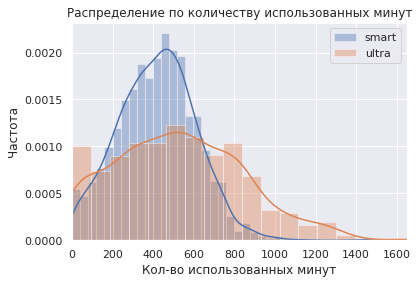

In [63]:
double_distplot_creator(smart_users, 'smart', ultra_users, 'ultra', 
                        'used_minutes', 
                        'Кол-во использованных минут', 1650, 'Распределение по количеству использованных минут')

Гистограмма наглядно отображает полученные значения стандартных отклонений количества использованных в месяц минут пользователями разных тарифов.  
Для тарифа "Смарт" более характерна группировка значений вокруг среднего - пользователи стараются уложиться в предоставленные тарифом 500 минут, но все же выходят за пределы лимита.  
Для тарифа "Ультра" характерен больший разброс относительно среднего, он предоставляет пользователям огромное кол-во минут - 3000. В рамках такого лимита поведение пользователей разнится больше. Гистограмма показывает, что пользователи данного тарифа чаще тратят большое кол-во минут. Но у них остается неиспользованным большой запас предоставленных тарифом минут.  
Также видим довольно большое кол-во пользователей, которые вообще не тратят минуты - т.е. можно сделать вывод, что они используют тариф для других целей, например, для интернета.

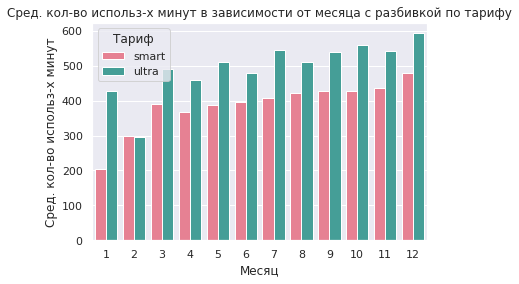

In [64]:
double_barplot_creator(tariffs_pivot, 'month', 'used_minutes', 'tariff_name', 
                       'Месяц', 'Сред. кол-во использ-х минут', 
                       'Сред. кол-во использ-х минут в зависимости от месяца с разбивкой по тарифу', 
                       'Тариф')

Диаграмма наглядно показывает, что в среднем пользователи тарифа "Ультра" тратят в месяц более кол-во минут, чем пользователи "Смарт", и у них остается еще большой запас предоставленных минут.   
Количество потраченных в месяц минут пользователями "Смарта" более прибижено к предоставленному лимиту.

Те же тенденции мы увидим на диаграммах, отражающих распределение по количеству звонков:

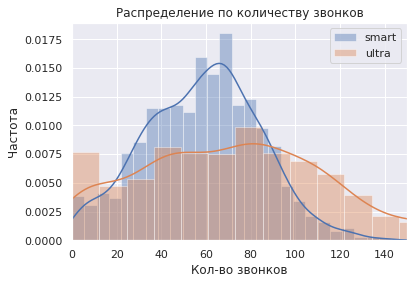

In [65]:
double_distplot_creator(smart_users, 'smart', ultra_users, 'ultra', 
                        'calls_qty', 
                        'Кол-во звонков', 150, 'Распределение по количеству звонков')

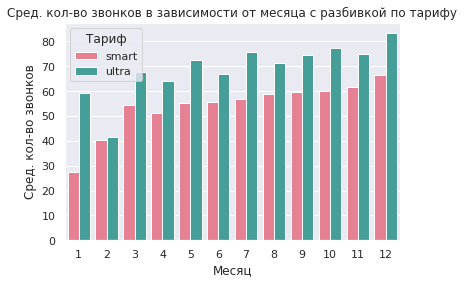

In [66]:
double_barplot_creator(tariffs_pivot, 'month', 'calls_qty', 'tariff_name', 
                       'Месяц', 'Сред. кол-во звонков', 
                       'Сред. кол-во звонков в зависимости от месяца с разбивкой по тарифу', 
                       'Тариф')

***Проанализируем количество используемых пользователями смс***

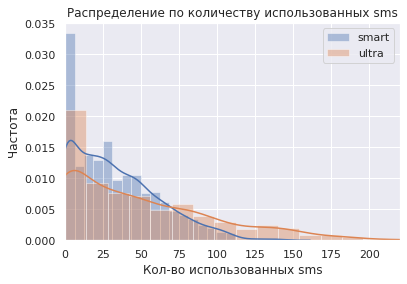

In [67]:
double_distplot_creator(smart_users, 'smart', ultra_users, 'ultra', 
                        'sms_qty', 'Кол-во использованных sms', 220, 'Распределение по количеству использованных sms')

Распределение скошено влево: для обоих тарифов характерно большое кол-во нулевых значений - смс уходят в прошлое, их место занимают мессенджеры.  
Рассчитанное стандартное отклонение у "Ультры" больше, и как видно на гистограмме, значения разбросаны относительно среднего шире,  что вероятнее всего обусловлено огромным лимитом тарифа. 

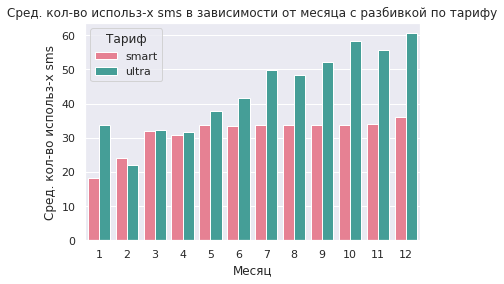

In [68]:
double_barplot_creator(tariffs_pivot, 'month', 'sms_qty', 'tariff_name', 
                       'Месяц', 'Сред. кол-во использ-х sms', 
                       'Сред. кол-во использ-х sms в зависимости от месяца с разбивкой по тарифу', 
                       'Тариф')

Пользователи "Ультры" в среднем печатают больше смс, чем пользователи "Смарта". Значения "Смарта" больше приближены к лимиту тарифа, а у пользователей "Ультры" остается колоссальное кол-во неиспользованных смс в месяц.

***Проанализируем объем использованного пользователями интернет-трафика***

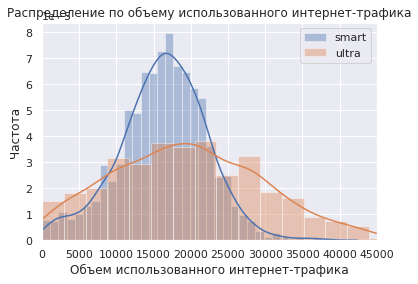

In [69]:
double_distplot_creator(smart_users, 'smart', 
                        ultra_users, 'ultra', 
                        'used_mb', 
                        'Объем использованного интернет-трафика', 45000,
                        'Распределение по объему использованного интернет-трафика')

Распределение использованного клиентами интернет-трафика больше похоже на нормальное. Как и у предыдущих рассмотренных параметров, стандартное отклонение у тарифа "Ультра" больше, и значенния шире разбросаны относительно среднего, что наглядно показывает гистограмма.  
Большинство пользователей "Смарта" стараются уложиться в установленный относительно небольшой лимит в 15 Гб.  
Лимит тарифа "Ультра" в два раза выше, пользователям не нужно беспокоиться о его превышение, в связи с чем разброс значений использованного трафика шире.

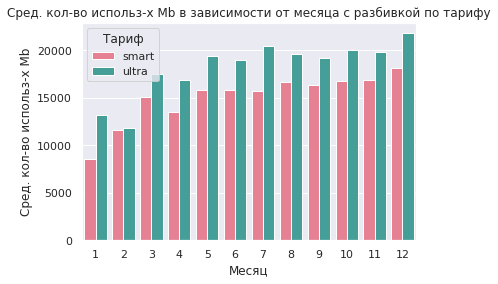

In [70]:
double_barplot_creator(tariffs_pivot, 'month', 'used_mb', 'tariff_name', 
                       'Месяц', 'Сред. кол-во использ-х Mb', 
                       'Сред. кол-во использ-х Mb в зависимости от месяца с разбивкой по тарифу', 
                       'Тариф')

Гистограмма показывает, что в среднем пользователи "Ультры" тратят больше интернет-трафика, чем пользователи "Смарта", но
в среднем у пользователей "Ультры" еще остается запас трафика примерно в 10Гб. А средний объем трафика пользователей "Смарта" тяготеет к установленному тарифом лимиту, и пользователи "Смарта" чаще выходят за пределы лимита, обуславливая дополнительное получение опретором прибыли с клиента.

***Проанализируем прибыль сверх абонентской платы за тариф***

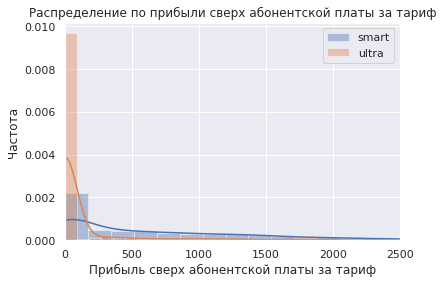

In [71]:
double_distplot_creator(smart_users, 'smart', ultra_users, 'ultra', 
                        'above_tariff_profit', 
                        'Прибыль сверх абонентской платы за тариф', 2500,
                        'Распределение по прибыли сверх абонентской платы за тариф')

Гистограмма наглядно показывает, что чаще всего дополнительной приюыли сверх тарифа от пользователей "Ультры" не получить. Довольно большая доля клиентов, укладывающихся в лимиты тарифа, и среди пользователей "Смарта".
Стандартное отклонение у "Смарта" по данному параметру выше. Видим и на гистограмме, что пользователи "Смарта" чаще пользователей "Ультры" выходят за лимиты тарифа и приносят оператору дополнительную прибыль.

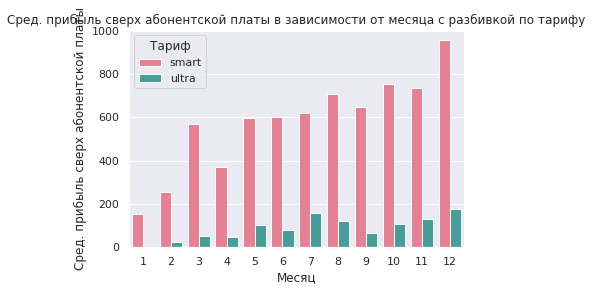

In [72]:
double_barplot_creator(tariffs_pivot, 'month', 'above_tariff_profit', 'tariff_name', 
                       'Месяц', 'Сред. прибыль сверх абонентской платы', 
                       'Сред. прибыль сверх абонентской платы в зависимости от месяца с разбивкой по тарифу', 
                       'Тариф')

Рассчитанное среднее значение прибыли сверх тарифа у "Смарта" в несколько раз больше, чем у "Ультры". Это отражается и на гистограмме. Средняя прибыль сверха тарифа у "Ультры" совсем невелика, а вот средняя прибыль сверх тарифа у "Смарта" даже выше его ежемесячной абонентской платы.

***Проанализируем общую прибыль по тарифам***

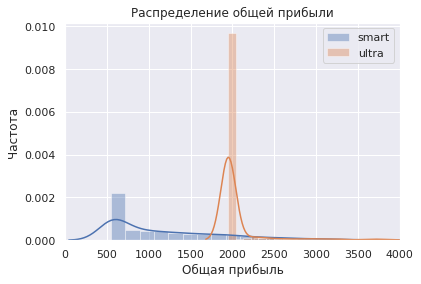

In [73]:
double_distplot_creator(smart_users, 'smart', ultra_users, 'ultra', 
                        'user_profit', 
                        'Общая прибыль', 4000,
                        'Распределение общей прибыли')

На гистограмме видим два пика, характеризующих ежемесячную абонентскую плату для каждого тарифа.  
Стандартное отклонение у "Смарта" в два раза больше, значения шире разбросаны относительно среднего.
Среднее значение прибыли по тарифу у "Смарта" в два раза больше его ежемесячной абонентской платы, т.е. пользователи данного тарифа не укладываются в установленные лимиты и чаще платят сверх тарифа.  
Пользователи дорогой "Ультры" чаще всего укладываются в тариф, среднее значение немного превышает ежемесячную абонентскую плату. 

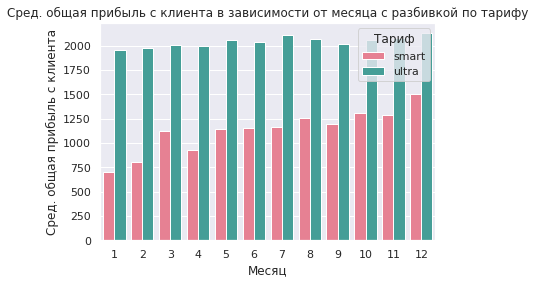

In [74]:
double_barplot_creator(tariffs_pivot, 'month', 'user_profit', 'tariff_name', 
                       'Месяц', 'Сред. общая прибыль с клиента', 
                       'Сред. общая прибыль с клиента в зависимости от месяца с разбивкой по тарифу', 
                       'Тариф')

Но даже при условии того, что пользователи "Смарта" не укладываются в установленные тарифом лимиты и платят сверх тарифа, они тратят почти в два раза меньше, чем пользователи дорогой "Ультры". Это отражается и на гистограмме.

#### Вывод <a class="anchor" id="conclusion3"></a>

Пользователи дорого тарифа "Ультра" используют большее кол-во минут и смс, а также больший объем интернет-трафика, чем пользователи тарифа "Смарт". При этом у них остается огромный запас неиспользованных минут, смс и трафика в месяц. Они редко выходят за пределы установленных тарифом лимитов, мало платят сверх тарифа.  
Пользователи тарифа "Смарт" используют меньшее кол-во минут и смс, меньший объем интернет-трафика, чаще выходят за установленные тарифом лимиты и платят сверх тарифа сумму равную ежемесячной абонентской плате тарифа. Однако при этом, их общие затраты на связь примерно в два раза ниже общих затрат на связь пользователей тарифа "Ультра".

### 4. Проверка гипотез <a class="anchor" id="point4"></a>

#### Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается  <a class="anchor" id="subpoint4_1"></a>

Требуется проверить Гипотезу о равенстве средних двух генеральных совокупностей. Выборки независимы, будем использовать T-тест для средних двух независимых выборок.   

Сформулируем гипотезы:  
Нулевая гипотеза (H0) - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.    
Альтернативная (H1) -  средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

<span style="color:blue"> Определим, с каким значением параметра equal_var проводить проверку гипотезы через T-критерий Стьюдента. Проведем стат.тест Левене: </span>


In [75]:
st.levene(smart_users['user_profit'], ultra_users['user_profit'], center='mean')

LeveneResult(statistic=656.5176825854346, pvalue=6.575293412962361e-132)

<span style="color:blue"> Полученное значение pvalue крайне малО.  
Это означает, вероятность того, что дисперсия выборок одинакова, очень мала.  
При проведении проверки гипотезы через T-критерий Стьюдента необходимо использовать значение параметра equal_var = False  </span>

Критический уровень статистической значимости зададим 0.05, если p-value окажется меньше него - отвергнем гипотезу H0.

In [76]:
alpha = 0.05
results = st.ttest_ind(
    smart_users['user_profit'], 
    ultra_users['user_profit'],
    equal_var = False)

print('средняя выручка пользователей тарифов «Смарт»: ', smart_users['user_profit'].mean())
print('средняя выручка пользователей тарифов «Ультра»: ', ultra_users['user_profit'].mean())
print()
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

средняя выручка пользователей тарифов «Смарт»:  1233.3494665489009
средняя выручка пользователей тарифов «Ультра»:  2060.5299710501267

p-значение: 8.931402711368788e-296
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить равные средние выручки по исследуемым тарифам слишком мала, можно сделать вывод о значимом различии между средними выручками тарифов «Ультра» и «Смарт».  
Как мы наглядно видели в предыдущем разделе, общая прибыль от клиентов "Ультры" почти в два раза выше, чем лот клиентов "Смарта".

#### Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов  <a class="anchor" id="subpoint4_2"></a>

Требуется проверить Гипотезу о равенстве средних двух генеральных совокупностей. Выборки независимы, будем использовать T-тест для средних двух независимых выборок.   

Сформулируем гипотезы:  
Нулевая гипотеза (H0) - средняя выручка пользователей из Москвы и пользователей из других регионов равны.    
Альтернативная (H1) -  средняя выручка пользователей из Москвы и пользователей из других регионов различается.

Составим выборки пользователей из Москвы и пользователей из других регионов:

In [77]:
moscow_users = users_pivot.query('city == "Москва"')
regional_users = users_pivot.query('city != "Москва"')

<span style="color:blue"> Определим, с каким значением параметра equal_var проводить проверку гипотезы через T-критерий Стьюдента. Проведем стат.тест Левене: </span>

In [78]:
st.levene(moscow_users['user_profit'], regional_users['user_profit'], center='mean')

LeveneResult(statistic=3.5667101508047576, pvalue=0.059039017535414746)

<span style="color:blue"> Полученное значение pvalue больше заданного по умолчанию уровня значимости = 0,05.  
Это означает, вероятность того, что дисперсия выборок одинакова, весьма велика.  
При проведении проверки гипотезы через T-критерий Стьюдента необходимо использовать значение параметра equal_var = True (как он задан по умолчанию) </span>

Критический уровень статистической значимости зададим 0.05, если p-value окажется меньше него - отвергнем гипотезу H0.

In [79]:
alpha = 0.05
results = st.ttest_ind(
    moscow_users['user_profit'], 
    regional_users['user_profit'])

print('средняя выручка пользователей из Москвы: ', moscow_users['user_profit'].mean())
print('средняя выручка пользователей из других регионов: ', regional_users['user_profit'].mean())
print()
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

средняя выручка пользователей из Москвы:  1507.276761968085
средняя выручка пользователей из других регионов:  1482.0637267996062

p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и пользователей из других регионов и неодинакова, с вероятностью в 47% такое или большее различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средняя выручками пользователей из Москвы и пользователей из других регионов.

#### Вывод <a class="anchor" id="conclusion4"></a>

Исходя из проверенных гипотез, можно сделать вывод, что с большей вероятностью прибыль от клиентов "Смарта" и "Ультры" отличается, а регион нахождения абонента не влияет на объем прибыли оператора.

### 5. Общий вывод <a class="anchor" id="point5"></a>

Пользователи тарифа "Смарт" приносят больше прибыли сверх ежемесячной абоненстской платы; прибыль сверх абонентской платы примерно равна ежемесячной абонентской плате.  
Но средняя общая прибыль больше от пользователей тарифа "Ультра", примерно в 2 раза. При этом доля клиентов, использующих тариф "Ультра" в два с лишним раза ниже, чем использующих тариф "Смарт". Для увеличения прибыли оператору стоит наращивать долю клиентов, использующих тариф "Ультра".  
Регион нахождения абонента не влияет на объем прибыли, получаемый с пользователя.